## Import necessary library

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get drawing from ndjson file
def get_drawings_dict(d_key):
    filename = "../data/full_simplified_" + d_key + ".ndjson"
    
    by_key_id = {}
    with open(filename) as f:
        i = 0
        for line in f:
            drawing = json.loads(line)
            
            # Filter only recognised one
            if drawing['recognized'] == True:
                by_key_id[i] = drawing
                i += 1
    return by_key_id

# Get the x and y coordinates of the drawing 
def get_coordinates(drawing_dict):
    x = []
    y = []
    list_stroke = drawing_dict['drawing']
    for i in range(len(list_stroke)):
        x.append(list_stroke[i][0])
        y.append(list_stroke[i][1])
    return x,y

# Get the set of country
def get_country(drawing_dict):
    country_set = set(val['countrycode'] for val in drawing_dict.values())
    return country_set

# Get all sample from a country
def get_samples_from_country(country, drawing_dict):
    newDict = dict()
    i = 0
    for (key,value) in drawing_dict.items():
        if value['countrycode'] == country:
            newDict[i] = value
            i += 1
    return newDict

def clockwise(x_list, y_list):
    sum_area = 0
    x = x_list[0]
    y = y_list[0]
    for i in range(len(x) - 1):
        sum_area += (x[i+1] - x[i])*(y[i+1]+y[i])
    if sum_area < 0:
        return True
    else:
        return False

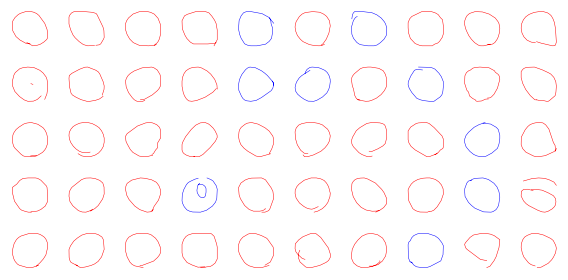

In [41]:
dict1 = get_drawings_dict('circle')

fig, ax_arr = plt.subplots(nrows=5, 
                           ncols=10, 
                           figsize=(8, 4),
                           subplot_kw=dict(xticks=[],
                                           yticks=[],
                                           frame_on=False))
fig.tight_layout()

n = 0
for row_num, ax_row in enumerate(ax_arr):    
    for col_num, ax in enumerate(ax_row):
        x,y = get_coordinates(dict1[n])
        if clockwise(x,y):
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='blue', linewidth=0.5)
        else:
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='red', linewidth=0.5)
        n += 1

plt.show()

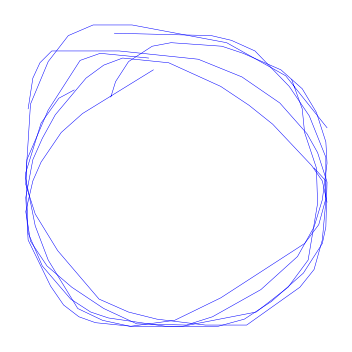

In [42]:
dict1 = get_drawings_dict('circle')

fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw=dict(xticks=[],
                                           yticks=[],
                                           frame_on=False))
fig.tight_layout()

for i in range(20):
    x,y = get_coordinates(dict1[i])
    if clockwise(x,y):
        for j in range(len(x)):
            plt.plot(x[j],y[j],color='blue', linewidth=0.5)

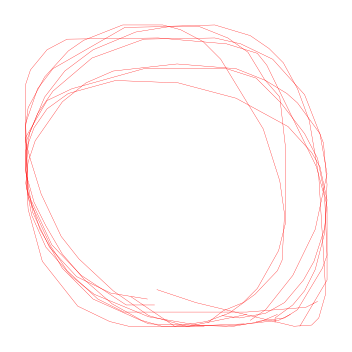

In [43]:
dict1 = get_drawings_dict('circle')

fig, ax = plt.subplots(figsize=(5, 5),
                           subplot_kw=dict(xticks=[],
                                           yticks=[],
                                           frame_on=False))
fig.tight_layout()

for i in range(10):
    x,y = get_coordinates(dict1[i])
    if not clockwise(x,y):
        for j in range(len(x)):
            plt.plot(x[j],y[j],color='red', linewidth=0.3)

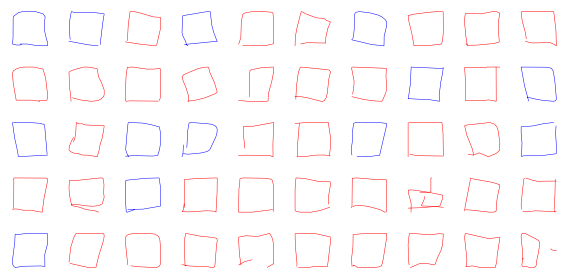

In [44]:
dict1 = get_drawings_dict('square')

fig, ax_arr = plt.subplots(nrows=5, 
                           ncols=10, 
                           figsize=(8, 4),
                           subplot_kw=dict(xticks=[],
                                           yticks=[],
                                           frame_on=False))
fig.tight_layout()

n = 0
for row_num, ax_row in enumerate(ax_arr):    
    for col_num, ax in enumerate(ax_row):
        x,y = get_coordinates(dict1[n])
        if clockwise(x,y):
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='blue', linewidth=0.5)
        else:
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='red', linewidth=0.5)
        n += 1

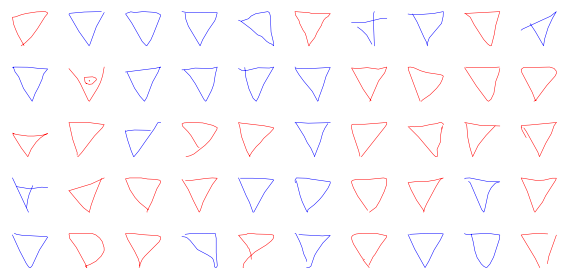

In [45]:
dict1 = get_drawings_dict('triangle')

fig, ax_arr = plt.subplots(nrows=5, 
                           ncols=10, 
                           figsize=(8, 4),
                           subplot_kw=dict(xticks=[],
                                           yticks=[],
                                           frame_on=False))
fig.tight_layout()

n = 0
for row_num, ax_row in enumerate(ax_arr):    
    for col_num, ax in enumerate(ax_row):
        x,y = get_coordinates(dict1[n])
        if clockwise(x,y):
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='blue', linewidth=0.5)
        else:
            for i in range(len(x)):
                ax.plot(x[i],y[i],color='red', linewidth=0.5)
        n += 1

## Create Csv file from dictionaries 

In [3]:
import pandas as pd
import pycountry

In [7]:
def get_stats(key):
    stats = dict()

    dict1 = get_drawings_dict(key)
    country_set = get_country(dict1)
    for country in country_set:
        drawing_per_country = get_samples_from_country(country, dict1)
        num_clockwise = 0
        num_counter_clockwise = 0
        for (key,value) in drawing_per_country.items():
            x,y = get_coordinates(value)
            if clockwise(x,y):
                num_clockwise += 1
            else:
                num_counter_clockwise +=1        
        
        # Rename the country from ISO 3166-1 alpha-2 to country name 
        country_class = pycountry.countries.get(alpha_2=country)
        try:
            country_name = country_class.name
            stats.update({country_name : [num_clockwise, num_counter_clockwise]})
        except:
            continue

    return stats

In [10]:
def to_csv(stats, file_name):
    df = pd.DataFrame.from_dict(stats)
    df = df.rename(index = {0: 'clockwise', 1:'counter_clockwise'})
    df = df.T
    df.to_csv(file_name)

In [11]:
# Define the keys
keys = ['circle', 'square', 'triangle']

for key in keys:
    stats = get_stats(key)
    to_csv(stats, './data/' + key + '_per_country.csv')

                                  clockwise  counter_clockwise
Kuwait                                   60                151
Estonia                                  28                217
Luxembourg                                4                 22
Panama                                    3                 11
Honduras                                  0                 14
Curaçao                                   0                 10
Switzerland                              65                374
Albania                                   4                 28
Bosnia and Herzegovina                   32                207
French Guiana                             2                  0
Martinique                                4                  3
Eswatini                                  0                  1
Mexico                                   50                394
Qatar                                    36                136
Turks and Caicos Islands                  0            